In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
anz = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [6]:
# Shape

anz.shape

(12043, 23)

In [8]:
# Descriptive Analysis

anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [10]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [11]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## Data Cleaning

In [4]:
# Null values

100*anz.isnull().sum()/len(anz)

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

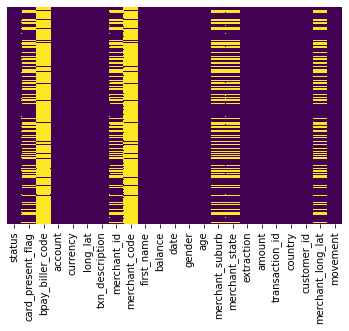

In [15]:
sns.heatmap(anz.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop down the unnecessary features which has higher order of missing value. Grouping the dataframe according to date, ammount, first_name, card flag,balance and gender & their age.

In [16]:
f_anz=anz.drop(['merchant_id','merchant_code','bpay_biller_code'],axis=1)
f_anz.groupby([pd.Grouper(key='date', freq='M'),'amount' ,'first_name','gender']).sum()

card_present_flag    balance  age
date       amount  first_name gender                                   
2018-08-31 1.52    Edward     M                     0.0    5054.84   19
           1.59    Diana      F                     1.0    1298.54   26
           1.71    Jessica    F                     0.0    2070.40   21
           1.90    Tonya      F                     1.0    2721.99   27
           2.00    Diana      F                     1.0     536.62   26
...                                                 ...        ...  ...
2018-10-31 4910.90 Jacqueline F                     0.0    7397.59   30
           5103.51 Christine  F                     0.0   43167.57   78
           6107.23 Ronald     M                     0.0   10753.02   25
           7081.09 Michele    F                     1.0    2063.14   30
           8835.98 Tim        M                     0.0  162944.60   80

[9396 rows x 3 columns]

Get a Series containing counts of unique values present in features like status, gender etc.

In [17]:
f_anz['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [18]:
f_anz['gender'].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [20]:
f_anz['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

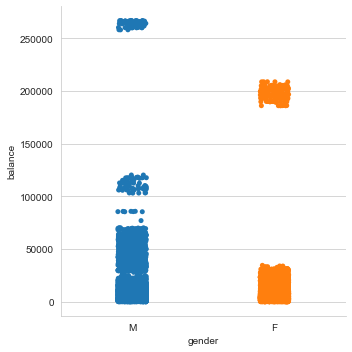

In [21]:
sns.set_style('whitegrid')
sns.catplot(x="gender", y="balance", order=["M", "F"], data=f_anz)

Average Amount of Transaction

In [22]:
f_anz['amount'].mean()

187.93358797641767

Average balance present in dataframe.

In [23]:
f_anz['balance'].mean()

14704.195553433592

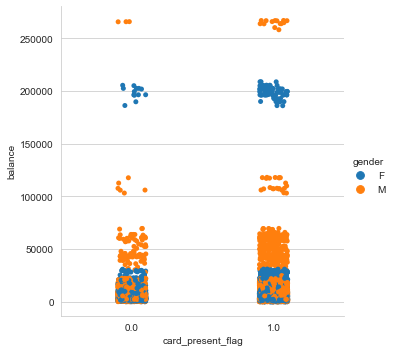

In [24]:
sns.set_style('whitegrid')
sns.catplot(x="card_present_flag", y="balance", hue='gender', data=f_anz)

distplot plots a univariate distribution of observations of age features. .hist histrogram represtation of data present in the features in the dataframe.

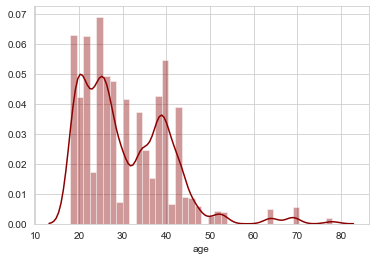

In [25]:
sns.distplot(f_anz['age'].dropna(),color='darkred',bins=40)

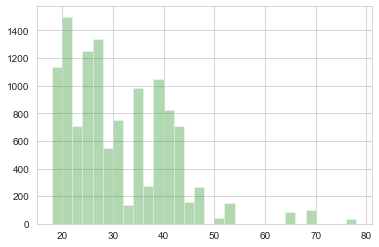

In [26]:
f_anz['age'].hist(bins=30,color='green',alpha=0.3)

Draw a plot of two variables continuous and dicreate with bivariate and univariate graphs.

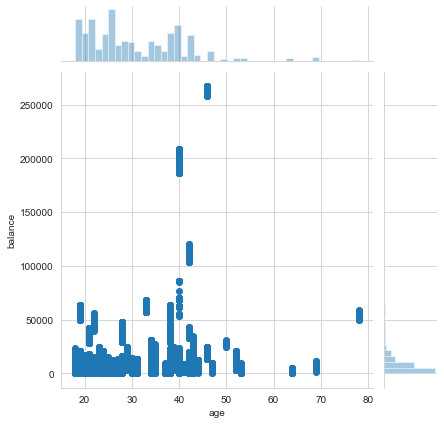

In [27]:
sns.jointplot(x='age',y='balance',data=f_anz)

Seaborn heatmap of corealation between all features present in dataframe

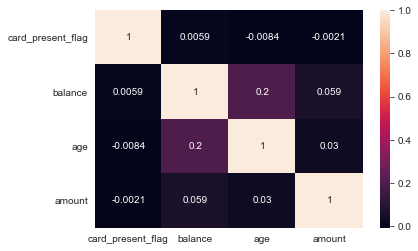

In [28]:
sns.heatmap(f_anz.corr(), annot=True)

Counting of transction of each month according to date with respect movement. & status of card.

In [30]:
f_anz['month'] = pd.DatetimeIndex(f_anz['date']).month

Text(0.5, 1.0, 'Status of card in counting of txn')

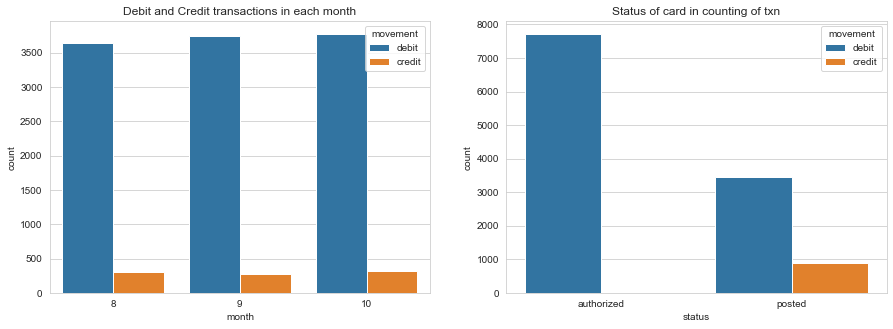

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.countplot(x='month',hue='movement',data=f_anz)
plt.title('Debit and Credit transactions in each month')
plt.subplot(1,2,2)
sns.countplot(x='status',hue='movement',data=f_anz)
plt.title('Status of card in counting of txn')

## Exploratory Data Analysis

In [32]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [34]:
anz['month']=pd.DatetimeIndex(anz['date']).month
anz['weekdays']=pd.DatetimeIndex(anz['date']).weekday

In [35]:
anz.groupby('month').agg(mean=('amount','mean'), median=('amount','median'), count=('amount','count'))

,mean,median,count
month,,,
8,185.121867,28.13,3943
9,182.045903,29.00,4013
10,196.427323,29.00,4087


In [37]:
def top_n_customers(anz, month, no_of_customers):
    print(f'Month : {month}')
    table_1=anz[anz['month']==month].groupby(['customer_id','account']).\
    agg(avg_bal=('balance', 'mean'),
        avg_amt=('amount', 'mean'),
        no_of_trans=('amount','count'),
        total_amt=('amount', 'sum')).sort_values(by='no_of_trans', ascending=False).iloc[:no_of_customers,:]
    table_2=pd.merge(table_1,
                     anz[['first_name','customer_id','account']],
                     on=['customer_id','account'],
                     how='inner').drop_duplicates().reset_index(drop=True)
    table_2.rename(columns={'first_name':'Name'}, inplace=True)
    return table_2

In [39]:
top_n_customers(anz,8,10)

Month : 8


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,1105.237701,45.536043,187,8515.24,Diana
1,CUS-3026014945,ACC-182446574,3029.745045,107.497027,111,11932.17,Tonya
2,CUS-2142601169,ACC-1222300524,1192.015957,64.206809,94,6035.44,Michael
3,CUS-1614226872,ACC-1037050564,1922.881818,72.420114,88,6372.97,Rhonda
4,CUS-3378712515,ACC-4258502723,1694.057952,83.950723,83,6967.91,Kimberly
5,CUS-1196156254,ACC-3485804958,17873.442805,179.216220,82,14695.73,Jessica
6,CUS-51506836,ACC-2673069055,15628.618378,109.467568,74,8100.60,Richard
7,CUS-2695611575,ACC-2890243754,1688.908286,88.865286,70,6220.57,Joseph
8,CUS-809013380,ACC-1990648130,2733.607794,105.385441,68,7166.21,Kaitlyn
9,CUS-127297539,ACC-3689607373,3619.391324,113.411912,68,7712.01,Virginia


In [40]:
top_n_customers(anz,9,10)

Month : 9


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,2242.639892,37.046216,185,6853.55,Diana
1,CUS-2142601169,ACC-1222300524,824.814231,88.248462,104,9177.84,Michael
2,CUS-1196156254,ACC-3485804958,22436.096633,113.517449,98,11124.71,Jessica
3,CUS-1614226872,ACC-1037050564,3681.143093,66.021753,97,6404.11,Rhonda
4,CUS-2695611575,ACC-2890243754,3727.276333,64.289667,90,5786.07,Joseph
5,CUS-860700529,ACC-1903037542,3416.491798,68.092247,89,6060.21,Jeffrey
6,CUS-3026014945,ACC-182446574,6080.274815,106.361235,81,8615.26,Tonya
7,CUS-127297539,ACC-3689607373,5482.882000,86.044000,80,6883.52,Virginia
8,CUS-1669695324,ACC-3481401842,4704.417179,99.410385,78,7754.01,Tiffany
9,CUS-51506836,ACC-2673069055,18639.625844,128.353766,77,9883.24,Richard


In [41]:
top_n_customers(anz,10,10)

Month : 10


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,1851.125825,52.634951,206,10842.80,Diana
1,CUS-2142601169,ACC-1222300524,1553.629714,80.792095,105,8483.17,Michael
2,CUS-3378712515,ACC-4258502723,5144.752277,89.831287,101,9072.96,Kimberly
3,CUS-3026014945,ACC-182446574,8808.494300,85.269100,100,8526.91,Tonya
4,CUS-860700529,ACC-1903037542,4671.130330,70.914286,91,6453.20,Jeffrey
5,CUS-51506836,ACC-2673069055,15050.509205,69.510341,88,6116.91,Richard
6,CUS-1669695324,ACC-3481401842,7372.890824,84.030471,85,7142.59,Tiffany
7,CUS-2695611575,ACC-2890243754,2921.620380,119.915570,79,9473.33,Joseph
8,CUS-1614226872,ACC-1037050564,4548.033243,87.964324,74,6509.36,Rhonda
9,CUS-2663907001,ACC-3827517394,44170.162603,175.036575,73,12777.67,Craig
